<a href="https://colab.research.google.com/github/MKrezheska/NLP_Project-Style_Change_Detection/blob/main/Models_doc2vec_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd

In [59]:
import json
import numpy as np 
import time
import joblib

In [60]:
df = pd.read_csv('drive/MyDrive/pan-2021/train-all-doc2vec-t2.csv')

In [61]:
df

,Unnamed: 0,emb,label
0,0,"[0.06924932, -0.25643814, -0.27330634, -0.7190...",2
1,1,"[0.06573843, -0.22989067, -0.31539053, -0.7379...",4
2,2,"[0.06285742, -0.26100272, -0.2918665, -0.76148...",4
3,3,"[0.046392955, -0.25465074, -0.2506725, -0.6695...",2
4,4,"[0.058492783, -0.26142803, -0.29558456, -0.752...",3
...,...,...,...
11195,11195,"[0.083049014, -0.21181066, -0.30392092, -0.782...",2
11196,11196,"[0.07690144, -0.2368402, -0.29450998, -0.71980...",3
11197,11197,"[0.07830705, -0.19369532, -0.3003696, -0.72892...",2
11198,11198,"[0.029893693, -0.26020843, -0.28396496, -0.746...",3


In [62]:
df = df.drop(["Unnamed: 0"], axis="columns")

In [63]:
df_valid = pd.read_csv('drive/MyDrive/pan-2021/validation-all-doc2vec-t2.csv')
df_valid.head()

,Unnamed: 0,emb,label
0,0,"[0.03939512, -0.24804303, -0.2813319, -0.72638...",4
1,1,"[0.038594052, -0.2600853, -0.29697317, -0.7238...",3
2,2,"[0.0663576, -0.28915745, -0.27263632, -0.76401...",3
3,3,"[0.07062378, -0.2118937, -0.33366448, -0.76128...",4
4,4,"[0.05476076, -0.27742493, -0.29275045, -0.7475...",4


In [64]:
df_valid = df_valid.drop(["Unnamed: 0"], axis="columns")

In [65]:
df_train = df.iloc[:, : ]
df_test = df_valid.iloc[:, : ]
print(len(df_train))
print(len(df_test))

11200
2400


In [66]:
y_train = df_train['label']
df_train.drop(['label'], axis=1, inplace= True)
df_train.head(20)

,emb
0,"[0.06924932, -0.25643814, -0.27330634, -0.7190..."
1,"[0.06573843, -0.22989067, -0.31539053, -0.7379..."
2,"[0.06285742, -0.26100272, -0.2918665, -0.76148..."
3,"[0.046392955, -0.25465074, -0.2506725, -0.6695..."
4,"[0.058492783, -0.26142803, -0.29558456, -0.752..."
5,"[0.035753787, -0.26272282, -0.3075458, -0.7400..."
6,"[0.058088552, -0.25928256, -0.28793675, -0.750..."
7,"[0.05072801, -0.23375107, -0.30449012, -0.7192..."
8,"[0.07670629, -0.2574865, -0.32222596, -0.79441..."
9,"[0.047125563, -0.22618222, -0.32718807, -0.754..."


In [67]:
y_test = df_test['label']
df_test.drop(['label'], axis=1, inplace= True)
df_test.head(20)

,emb
0,"[0.03939512, -0.24804303, -0.2813319, -0.72638..."
1,"[0.038594052, -0.2600853, -0.29697317, -0.7238..."
2,"[0.0663576, -0.28915745, -0.27263632, -0.76401..."
3,"[0.07062378, -0.2118937, -0.33366448, -0.76128..."
4,"[0.05476076, -0.27742493, -0.29275045, -0.7475..."
5,"[0.016969422, -0.28680927, -0.2456671, -0.7298..."
6,"[0.07492879, -0.2016417, -0.311591, -0.7444280..."
7,"[0.068105504, -0.27478743, -0.2942579, -0.7808..."
8,"[0.07256639, -0.2535855, -0.31979063, -0.76345..."
9,"[0.04020924, -0.28264266, -0.28948796, -0.7489..."


In [68]:
xtrain = df_train.values.tolist()
X_test = df_test.values.tolist()

In [69]:
xtrain = [eval(xtrain[i][0]) for i in range(0, len(xtrain))]
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [70]:
xtrain = np.asarray(xtrain)

In [71]:
X_test = np.asarray(X_test)

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [73]:
def print_confusion_matrix(preds, labels, names):
  print(classification_report(labels, preds))

  # Mатрица на конфузија 
  names = names
  confusion = confusion_matrix(labels, preds)
  confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]
  df_1 = pd.DataFrame(data=confusion, columns=names, index=names)
  image = sns.heatmap(df_1, annot=True, fmt=".1f", vmin=0, vmax=100,cmap='Greens')
  image.set_title('Confusion matrix')
  image.set_ylabel('True label')
  image.set_xlabel('Predicted label')
  image.plot()

In [74]:
ytrain = y_train

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           1       0.24      0.27      0.26       600
           2       0.24      0.24      0.24       600
           3       0.24      0.24      0.24       600
           4       0.27      0.24      0.26       600

    accuracy                           0.25      2400
   macro avg       0.25      0.25      0.25      2400
weighted avg       0.25      0.25      0.25      2400



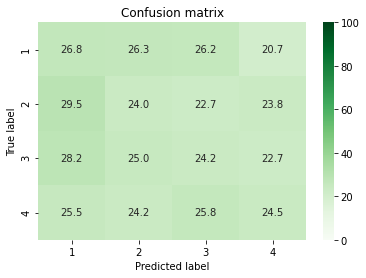

In [77]:
print_confusion_matrix(test_tree_predict,y_test, ["1", "2", "3", "4"])

              precision    recall  f1-score   support

           1       0.22      0.02      0.04       600
           2       0.28      0.01      0.02       600
           3       0.38      0.01      0.02       600
           4       0.25      0.97      0.40       600

    accuracy                           0.25      2400
   macro avg       0.28      0.25      0.12      2400
weighted avg       0.28      0.25      0.12      2400



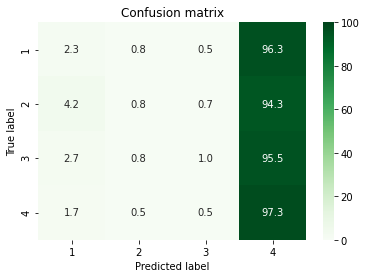

In [78]:
print_confusion_matrix(test_naive_predict, y_test, ["1", "2", "3", "4"])

              precision    recall  f1-score   support

           1       0.27      0.42      0.33       600
           2       0.26      0.38      0.31       600
           3       0.27      0.17      0.20       600
           4       0.42      0.14      0.21       600

    accuracy                           0.28      2400
   macro avg       0.30      0.28      0.26      2400
weighted avg       0.30      0.28      0.26      2400



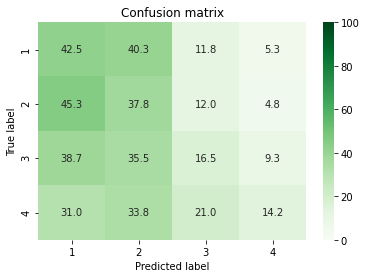

In [79]:
print_confusion_matrix(test_random_forest_predict,y_test, ["1", "2", "3", "4"])

In [81]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score


parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [82]:
print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

Best score: 0.333
Best parameters set:
	 bootstrap: True
	 criterion: 'gini'
	 max_depth: 5
	 max_features: 'auto'
	 max_samples: 0.5
	 min_samples_leaf: 5
	 min_samples_split: 2
	 n_estimators: 5
	 oob_score: True
	 random_state: None


accuracy:  0.28125
              precision    recall  f1-score   support

           1       0.29      0.55      0.38       600
           2       0.24      0.17      0.20       600
           3       0.25      0.19      0.21       600
           4       0.35      0.22      0.27       600

    accuracy                           0.28      2400
   macro avg       0.28      0.28      0.26      2400
weighted avg       0.28      0.28      0.26      2400



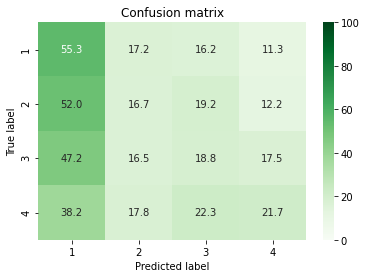

In [83]:
print("accuracy: ",accuracy_score(y_test, y_pred))
print_confusion_matrix( y_pred,y_test, ["1", "2", "3", "4"])

In [84]:
X_train_norm = xtrain
X_test_norm = X_test

In [85]:
!pip install catboost

In [86]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

In [87]:
train_pool = Pool(data=xtrain,label = ytrain)

In [88]:
import sklearn.metrics as metrics

In [89]:
model_basic = CatBoostClassifier()
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

predicted_values = model_basic.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'MultiClass': 0.3063729199298118}}


              precision    recall  f1-score   support

           1       0.30      0.63      0.40       600
           2       0.26      0.26      0.26       600
           3       0.30      0.14      0.19       600
           4       0.43      0.18      0.26       600

    accuracy                           0.30      2400
   macro avg       0.32      0.30      0.28      2400
weighted avg       0.32      0.30      0.28      2400

Accuracy: 0.30416666666666664


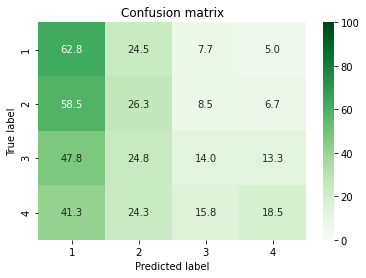

In [90]:
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [91]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
import matplotlib.pyplot as plt

Learning rate:  0.5
              precision    recall  f1-score   support

           1       0.30      0.47      0.37       600
           2       0.27      0.34      0.30       600
           3       0.27      0.18      0.22       600
           4       0.34      0.19      0.24       600

    accuracy                           0.29      2400
   macro avg       0.30      0.29      0.28      2400
weighted avg       0.30      0.29      0.28      2400



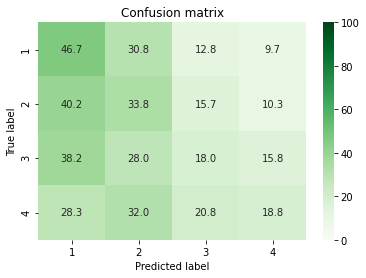

Learning rate:  0.75
              precision    recall  f1-score   support

           1       0.31      0.44      0.36       600
           2       0.26      0.29      0.28       600
           3       0.30      0.23      0.26       600
           4       0.31      0.22      0.26       600

    accuracy                           0.30      2400
   macro avg       0.30      0.30      0.29      2400
weighted avg       0.30      0.30      0.29      2400



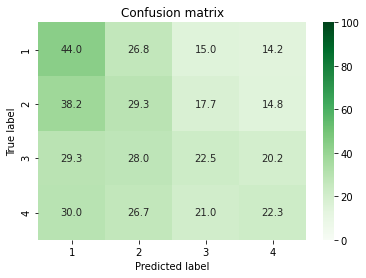

Learning rate:  1
              precision    recall  f1-score   support

           1       0.28      0.43      0.34       600
           2       0.29      0.30      0.30       600
           3       0.27      0.22      0.24       600
           4       0.34      0.21      0.26       600

    accuracy                           0.29      2400
   macro avg       0.30      0.29      0.28      2400
weighted avg       0.30      0.29      0.28      2400



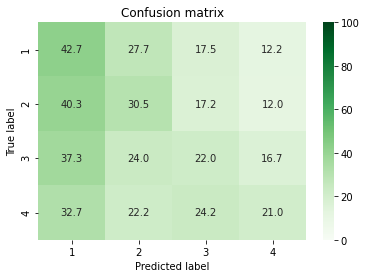

Learning rate:  1.1
              precision    recall  f1-score   support

           1       0.29      0.37      0.32       600
           2       0.29      0.31      0.30       600
           3       0.25      0.18      0.21       600
           4       0.29      0.26      0.28       600

    accuracy                           0.28      2400
   macro avg       0.28      0.28      0.28      2400
weighted avg       0.28      0.28      0.28      2400



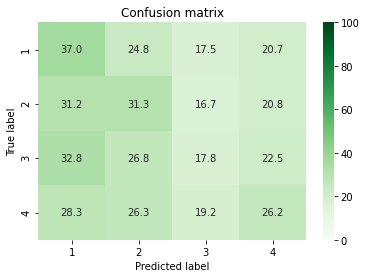

Learning rate:  1.2
              precision    recall  f1-score   support

           1       0.31      0.27      0.29       600
           2       0.29      0.30      0.30       600
           3       0.29      0.22      0.25       600
           4       0.28      0.38      0.32       600

    accuracy                           0.29      2400
   macro avg       0.29      0.29      0.29      2400
weighted avg       0.29      0.29      0.29      2400



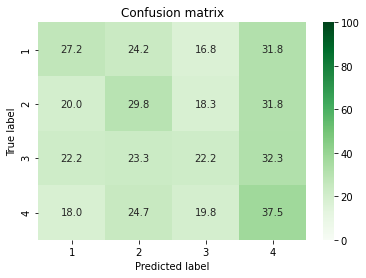

Learning rate:  1.3
              precision    recall  f1-score   support

           1       0.28      0.45      0.34       600
           2       0.27      0.29      0.28       600
           3       0.29      0.18      0.22       600
           4       0.28      0.19      0.23       600

    accuracy                           0.28      2400
   macro avg       0.28      0.28      0.27      2400
weighted avg       0.28      0.28      0.27      2400



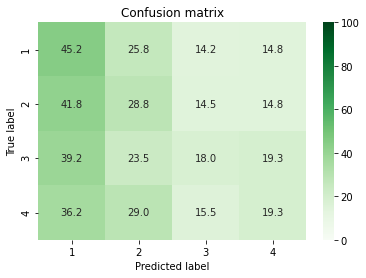

Learning rate:  1.4
              precision    recall  f1-score   support

           1       0.24      0.24      0.24       600
           2       0.28      0.36      0.32       600
           3       0.23      0.11      0.15       600
           4       0.26      0.31      0.28       600

    accuracy                           0.26      2400
   macro avg       0.25      0.26      0.25      2400
weighted avg       0.25      0.26      0.25      2400



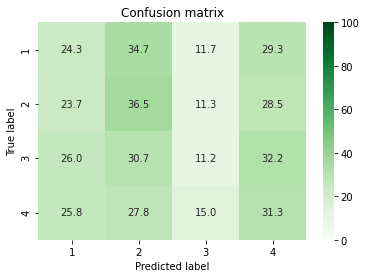

Learning rate:  1.5
              precision    recall  f1-score   support

           1       0.27      0.27      0.27       600
           2       0.29      0.35      0.32       600
           3       0.26      0.20      0.23       600
           4       0.26      0.27      0.27       600

    accuracy                           0.28      2400
   macro avg       0.27      0.28      0.27      2400
weighted avg       0.27      0.28      0.27      2400



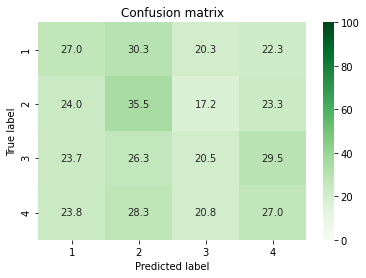

Learning rate:  2
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       600
           2       0.23      0.01      0.03       600
           3       0.24      0.36      0.29       600
           4       0.24      0.59      0.35       600

    accuracy                           0.24      2400
   macro avg       0.18      0.24      0.17      2400
weighted avg       0.18      0.24      0.17      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


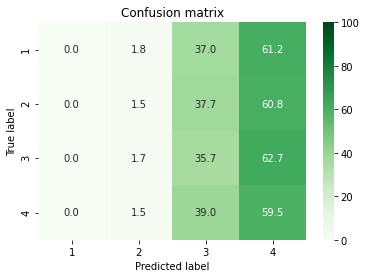

Learning rate:  3
              precision    recall  f1-score   support

           1       0.27      0.38      0.32       600
           2       0.29      0.28      0.29       600
           3       0.27      0.43      0.33       600
           4       0.00      0.00      0.00       600

    accuracy                           0.27      2400
   macro avg       0.21      0.27      0.23      2400
weighted avg       0.21      0.27      0.23      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


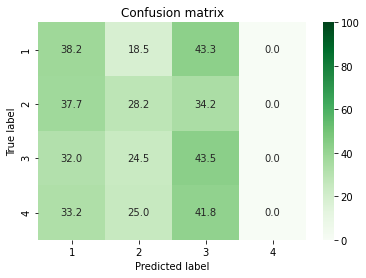

Learning rate:  4
              precision    recall  f1-score   support

           1       0.20      0.19      0.19       600
           2       0.24      0.11      0.15       600
           3       0.25      0.63      0.35       600
           4       0.00      0.00      0.00       600

    accuracy                           0.23      2400
   macro avg       0.17      0.23      0.18      2400
weighted avg       0.17      0.23      0.18      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


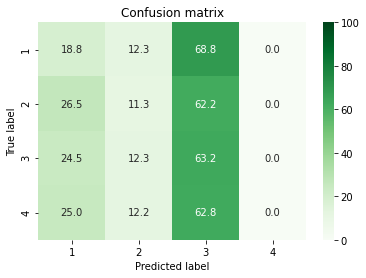

Learning rate:  5
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       600
           2       0.23      0.42      0.30       600
           3       0.00      0.00      0.00       600
           4       0.25      0.54      0.34       600

    accuracy                           0.24      2400
   macro avg       0.12      0.24      0.16      2400
weighted avg       0.12      0.24      0.16      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


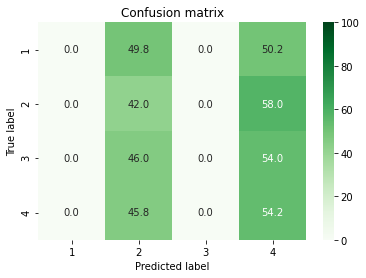

Learning rate:  6.3
              precision    recall  f1-score   support

           1       0.27      0.22      0.24       600
           2       0.26      0.75      0.38       600
           3       0.34      0.07      0.12       600
           4       0.42      0.03      0.06       600

    accuracy                           0.27      2400
   macro avg       0.32      0.27      0.20      2400
weighted avg       0.32      0.27      0.20      2400



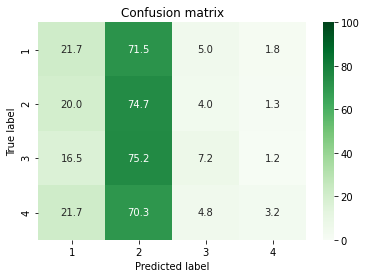

Learning rate:  7.7
              precision    recall  f1-score   support

           1       0.25      0.01      0.02       600
           2       0.20      0.01      0.02       600
           3       0.24      0.54      0.33       600
           4       0.25      0.41      0.31       600

    accuracy                           0.24      2400
   macro avg       0.23      0.24      0.17      2400
weighted avg       0.23      0.24      0.17      2400



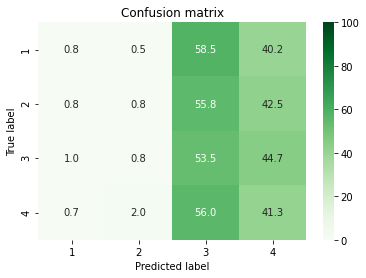

Learning rate:  10
              precision    recall  f1-score   support

           1       0.25      0.63      0.36       600
           2       0.00      0.00      0.00       600
           3       0.27      0.40      0.32       600
           4       0.00      0.00      0.00       600

    accuracy                           0.26      2400
   macro avg       0.13      0.26      0.17      2400
weighted avg       0.13      0.26      0.17      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


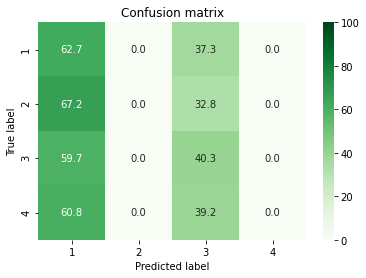

Learning rate:  20
              precision    recall  f1-score   support

           1       0.26      0.40      0.32       600
           2       0.23      0.31      0.27       600
           3       0.26      0.29      0.28       600
           4       0.25      0.00      0.00       600

    accuracy                           0.25      2400
   macro avg       0.25      0.25      0.22      2400
weighted avg       0.25      0.25      0.22      2400



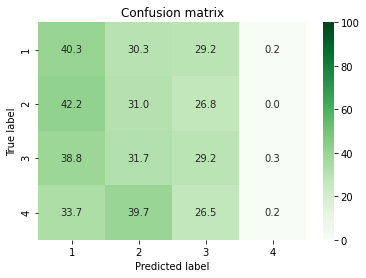

Learning rate:  30
              precision    recall  f1-score   support

           1       0.25      0.48      0.33       600
           2       0.00      0.00      0.00       600
           3       0.24      0.28      0.26       600
           4       0.23      0.21      0.22       600

    accuracy                           0.24      2400
   macro avg       0.18      0.24      0.20      2400
weighted avg       0.18      0.24      0.20      2400



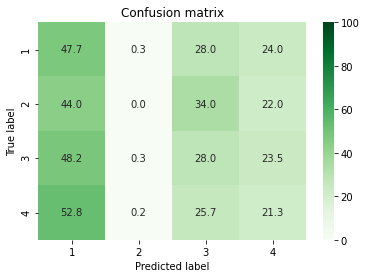

Learning rate:  45
              precision    recall  f1-score   support

           1       0.25      0.58      0.35       600
           2       0.23      0.04      0.06       600
           3       0.26      0.35      0.30       600
           4       0.37      0.07      0.12       600

    accuracy                           0.26      2400
   macro avg       0.28      0.26      0.21      2400
weighted avg       0.28      0.26      0.21      2400



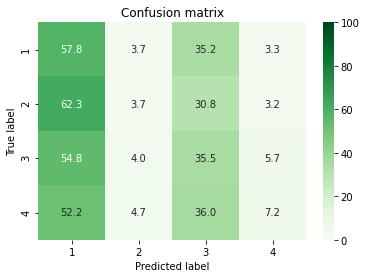

Learning rate:  55
              precision    recall  f1-score   support

           1       0.28      0.42      0.34       600
           2       0.22      0.09      0.13       600
           3       0.26      0.42      0.32       600
           4       0.28      0.14      0.18       600

    accuracy                           0.27      2400
   macro avg       0.26      0.27      0.24      2400
weighted avg       0.26      0.27      0.24      2400



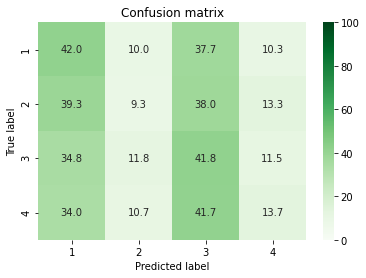

Learning rate:  62
              precision    recall  f1-score   support

           1       0.27      0.64      0.38       600
           2       0.21      0.09      0.12       600
           3       0.25      0.14      0.18       600
           4       0.27      0.17      0.21       600

    accuracy                           0.26      2400
   macro avg       0.25      0.26      0.22      2400
weighted avg       0.25      0.26      0.22      2400



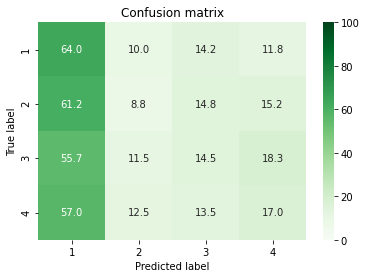

Learning rate:  77
              precision    recall  f1-score   support

           1       0.26      0.47      0.34       600
           2       0.26      0.25      0.25       600
           3       0.24      0.06      0.09       600
           4       0.30      0.30      0.30       600

    accuracy                           0.27      2400
   macro avg       0.27      0.27      0.25      2400
weighted avg       0.27      0.27      0.25      2400



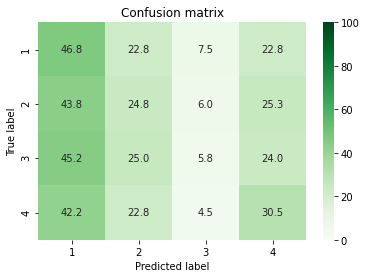

Learning rate:  84
              precision    recall  f1-score   support

           1       0.29      0.41      0.34       600
           2       0.25      0.50      0.33       600
           3       0.25      0.08      0.12       600
           4       0.36      0.10      0.15       600

    accuracy                           0.27      2400
   macro avg       0.29      0.27      0.24      2400
weighted avg       0.29      0.27      0.24      2400



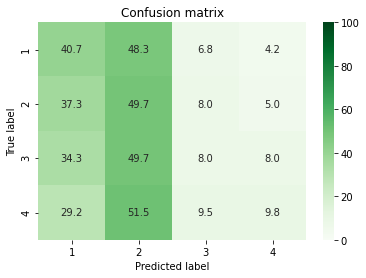

Learning rate:  90
              precision    recall  f1-score   support

           1       0.23      0.02      0.04       600
           2       0.26      0.66      0.37       600
           3       0.23      0.23      0.23       600
           4       0.35      0.12      0.18       600

    accuracy                           0.26      2400
   macro avg       0.26      0.26      0.20      2400
weighted avg       0.26      0.26      0.20      2400



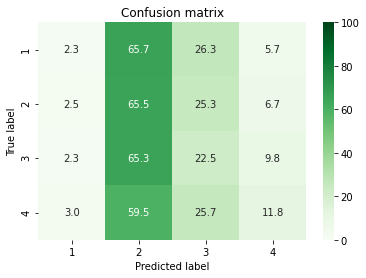

In [93]:
lr_list = [ 0.5, 0.75, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6.3, 7.7, 10, 20, 30, 45, 55, 62, 77, 84, 90]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=2, max_depth=4, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    predicted_values = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
    plt.show()

In [94]:
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [95]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [96]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier((20, ), max_iter=100000).fit(xtrain, ytrain)

In [97]:
predicted_values = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.32      0.45      0.37       600
           2       0.30      0.27      0.28       600
           3       0.27      0.22      0.25       600
           4       0.37      0.33      0.35       600

    accuracy                           0.32      2400
   macro avg       0.32      0.32      0.31      2400
weighted avg       0.32      0.32      0.31      2400

Accuracy: 0.3179166666666667


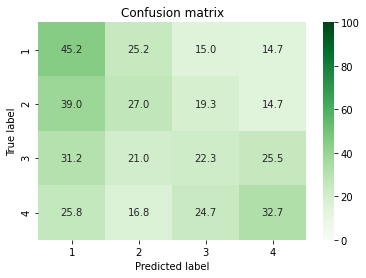

In [98]:
print_confusion_matrix(predicted_values, y_test,["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.33      0.44      0.38       600
           2       0.30      0.32      0.31       600
           3       0.27      0.23      0.25       600
           4       0.38      0.29      0.33       600

    accuracy                           0.32      2400
   macro avg       0.32      0.32      0.32      2400
weighted avg       0.32      0.32      0.32      2400

Accuracy: 0.32166666666666666


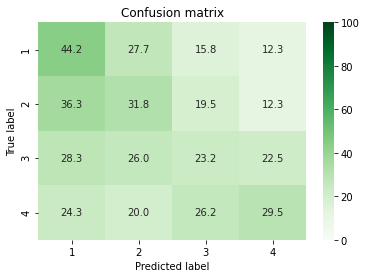

In [99]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test,["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.32      0.41      0.36       600
           2       0.30      0.24      0.27       600
           3       0.28      0.23      0.25       600
           4       0.34      0.36      0.35       600

    accuracy                           0.31      2400
   macro avg       0.31      0.31      0.31      2400
weighted avg       0.31      0.31      0.31      2400

Accuracy: 0.3120833333333333


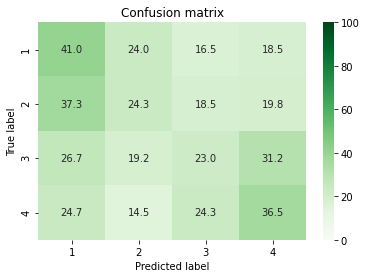

In [100]:
clf = MLPClassifier((1000, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.33      0.43      0.37       600
           2       0.29      0.27      0.28       600
           3       0.27      0.22      0.24       600
           4       0.37      0.35      0.36       600

    accuracy                           0.32      2400
   macro avg       0.31      0.32      0.31      2400
weighted avg       0.31      0.32      0.31      2400

Accuracy: 0.31708333333333333


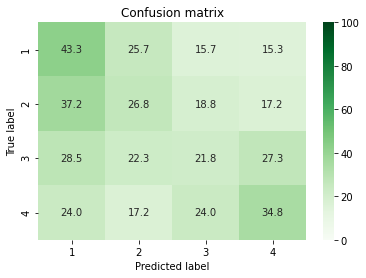

In [101]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [102]:
import keras
from keras.models import Sequential 
from keras.layers import Dense   
from tensorflow.keras.callbacks import EarlyStopping